In [1]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import re
import numpy as np
import pandas as pd

# HW6

### Tworzenie grafu

In [2]:
G = nx.DiGraph()

### Krawędzie

In [3]:
edges = pd.read_csv("edges.csv")
edges

,source,target,rank,gender
0,0,0,Asst,M
1,0,0,Assoc,M
2,0,0,Assoc,M
3,0,0,Full,M
4,0,0,Full,M
...,...,...,...,...
4983,205,143,Full,M
4984,205,182,Asst,M
4985,205,197,Asst,M
4986,205,197,Assoc,F


In [4]:
edges = edges.groupby(['source', 'target']).agg(
    count = ('gender', 'count'),
    gender = ('gender', 'sum')
).reset_index()
edges

,source,target,count,gender
0,0,0,9,MMMMMMFMM
1,0,1,9,MMMMMMMFM
2,0,2,14,MFMMMMMMFMFMMM
3,0,3,2,MM
4,0,4,7,MMMMFMM
...,...,...,...,...
3048,205,199,1,M
3049,205,200,1,M
3050,205,202,2,MM
3051,205,203,2,MM


In [5]:
edges.loc[edges['gender'].str.contains("F") & edges['gender'].str.contains("M"), ['gender']] = 'FM'
edges.loc[edges['gender'].str.contains("M") & ~edges['gender'].str.contains("F"), ['gender']] = 'M'
edges.loc[edges['gender'].str.contains("F") & ~edges['gender'].str.contains("M"), ['gender']] = 'F'
edges

,source,target,count,gender
1452,30,43,1,M
3011,205,149,1,M
264,3,81,1,M
1653,36,167,1,F
2059,75,43,2,M
...,...,...,...,...
1434,29,92,1,M
183,2,46,1,M
2756,152,161,1,M
1237,24,29,1,M


In [6]:
edges = edges.sample(500) # aby graf był czytelniejszy, zgodnie z poleceniem graf może być syntetyczny
G = nx.from_pandas_edgelist(edges, "source", "target", edge_attr=["gender", "count"], create_using=nx.DiGraph())

In [7]:
edge_colors = [
    'deeppink' if G.edges[edge]['gender'] == "F" else
    'deepskyblue' if G.edges[edge]['gender'] == "M" else
    'darkviolet' if G.edges[edge]['gender'] == "FM" else
    'grey' for edge in G.edges
]
edge_colors

['deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'darkviolet',
 'deeppink',
 'darkviolet',
 'deepskyblue',
 'deepskyblue',
 'darkviolet',
 'deepskyblue',
 'deepskyblue',
 'darkviolet',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'darkviolet',
 'deepskyblue',
 'darkviolet',
 'deepskyblue',
 'deepskyblue',
 'darkviolet',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'darkviolet',
 'darkviolet',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deeppink',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'deeppink',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'darkviolet',
 'deepskyblue',
 'deepskyblue',
 'deepskyblue',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'deepskyblue',
 'deeppink',
 'darkviolet',
 'deepskyblue',
 'deeppink',
 'deepskyblue',
 'darkviolet',
 'deepskyblue',
 'darkviolet',
 'darkvi

### Wierzchołki

In [8]:
nodes = pd.read_csv("nodes.csv")
head_nodes = 25 # aby graf był czytelny, wszystkich wierzchołków jest 206
nodes = nodes.head(head_nodes)
nodes

,index,name,pi,USN2010,NRC95,Region,institution,position
0,0,1,2.23,1,1,West,Stanford University,"array([-7.59363812, 5.82120879])"
1,1,2,2.31,1,3,West,UC Berkeley,"array([-7.56257198, 5.79237204])"
2,2,3,3.52,1,2,Northeast,MIT,"array([-7.5708025 , 5.80711383])"
3,3,5,6.12,17,11,Northeast,Harvard University,"array([-7.61994034, 5.81027949])"
4,4,6,8.29,5,5,Northeast,Cornell University,"array([-7.57951676, 5.79117444])"
5,5,7,9.28,1,4,Northeast,Carnegie Mellon University,"array([-7.5572546 , 5.82608736])"
6,6,8,9.32,8,6,Northeast,Princeton University,"array([-7.58986023, 5.76500558])"
7,7,9,9.98,20,14,Northeast,Yale University,"array([-7.61014468, 5.84179011])"
8,8,10,11.06,7,9,West,University of Washington,"array([-7.56988894, 5.77318183])"
9,9,11,13.43,5,8,Midwest,"University of Illinois, Urbana Champaign","array([-7.53933718, 5.79486711])"


In [9]:
node_color_map = {
    'West': 'olive',
    'Midwest': 'gold',
    'Northeast': 'lightgreen',
    'South': 'lightsalmon',
    'Canada': 'orangered',
    'Earth': 'dodgerblue'
}
node_colors = [node_color_map[region] for region in nodes["Region"]]
node_colors

['olive',
 'olive',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'olive',
 'gold',
 'gold',
 'lightgreen',
 'lightsalmon',
 'olive',
 'lightgreen',
 'gold',
 'lightsalmon',
 'lightgreen',
 'orangered',
 'lightgreen',
 'olive',
 'lightsalmon',
 'lightgreen',
 'olive',
 'lightsalmon']

In [10]:
position = dict(zip(nodes["index"], nodes["position"].str.strip('array([])').str.split(',').apply(lambda x:[float(x) for x in x])))
position

{0: [-7.59363812, 5.82120879],
 1: [-7.56257198, 5.79237204],
 2: [-7.5708025, 5.80711383],
 3: [-7.61994034, 5.81027949],
 4: [-7.57951676, 5.79117444],
 5: [-7.5572546, 5.82608736],
 6: [-7.58986023, 5.76500558],
 7: [-7.61014468, 5.84179011],
 8: [-7.56988894, 5.77318183],
 9: [-7.53933718, 5.79486711],
 10: [-7.54558463, 5.77551152],
 11: [-7.60285863, 5.77982828],
 12: [-7.50348776, 5.85163381],
 13: [-7.55643452, 5.75576949],
 14: [-7.63467171, 5.82747678],
 15: [-7.59010997, 5.89383713],
 16: [-7.54498618, 5.81478725],
 17: [-7.62389446, 5.78569003],
 18: [-7.64370802, 5.80371277],
 19: [-7.60355043, 5.86935162],
 20: [-7.50538838, 5.76786335],
 21: [-7.57770556, 5.70749007],
 22: [-7.52833167, 5.82828644],
 23: [-7.57834358, 5.73800881],
 24: [-7.59491622, 5.8027661]}

In [11]:
G = nx.subgraph(G, nodes["index"][0:head_nodes])

### Rysowanie

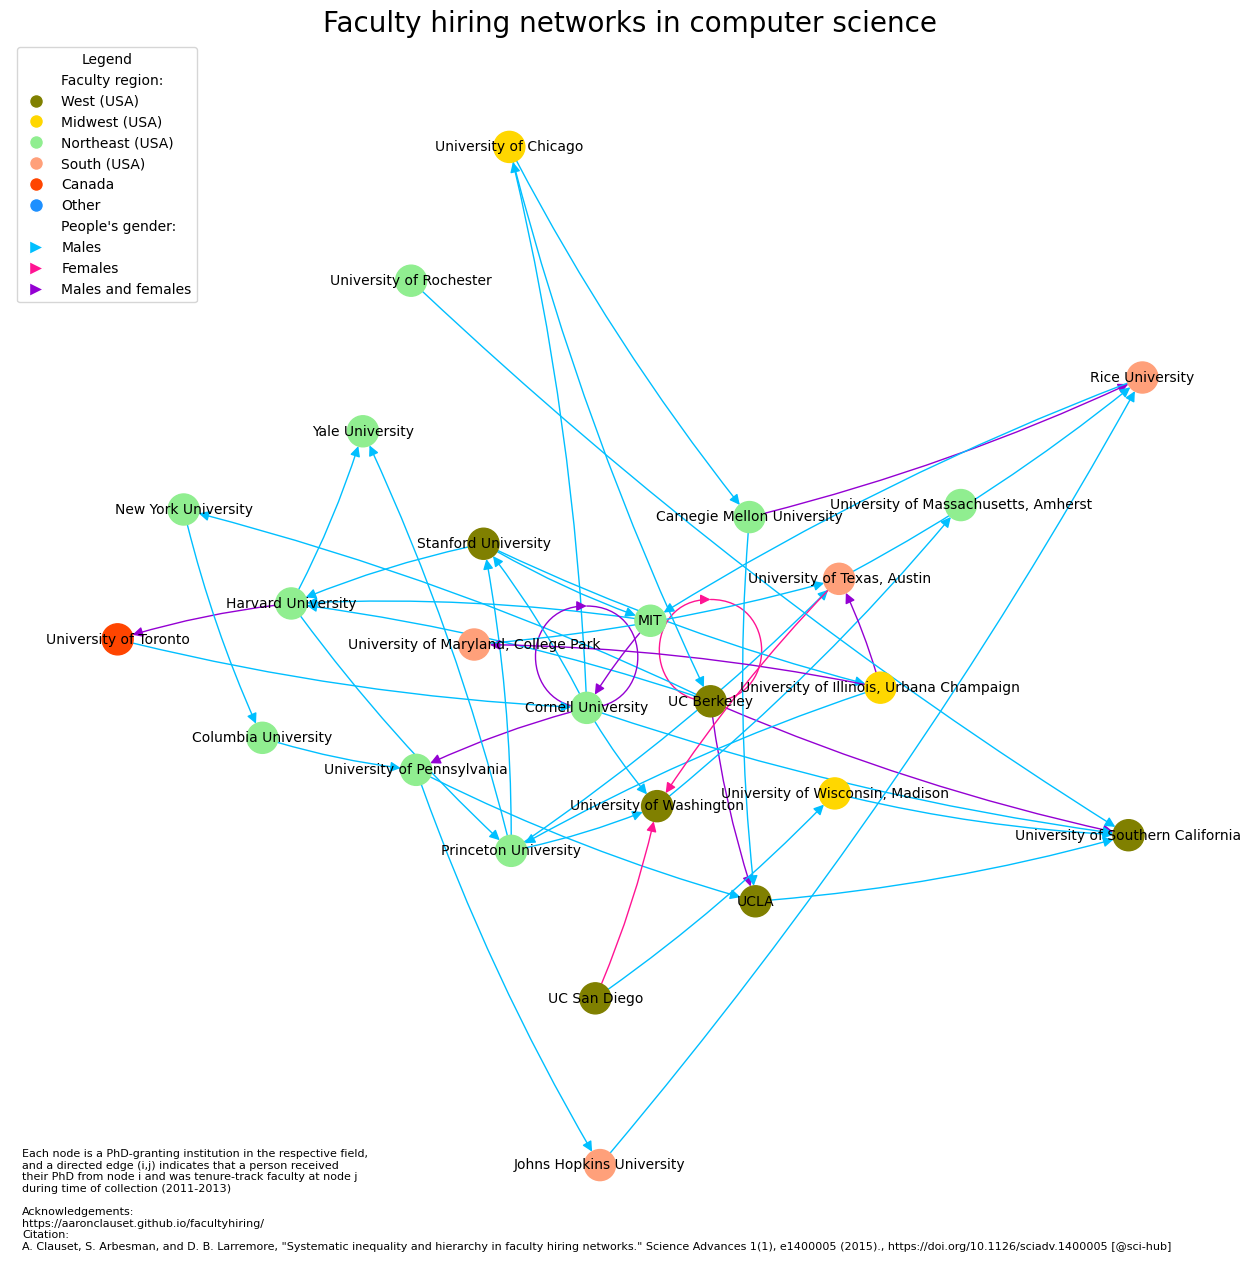

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))

# tytuł
plt.title('Faculty hiring networks in computer science', fontsize=20)

# rysowanie grafu
nx.draw(G,
        pos = position,
        node_size = 500,
        arrowsize = 15,
        # width = [e[2]["count"] * 0.1 for e in G.edges(data=True)], # ale tego nie dodaję, bo nie nie można wstawić dodatkowej legendy
        width = 1,
        node_color = node_colors,
        arrows=True,
        connectionstyle = 'arc3,rad=0.05',
        edge_color = edge_colors,
        ax = ax
       )

# podpisy wierzchołków
for i, (node, (x, y)) in enumerate(position.items()):
    ax.text(x, y, nodes["institution"][i], fontsize = 10, ha = "center", va = "center")
    
# tekst opisowy
ax.text(0.01, 0.1, 
"""Each node is a PhD-granting institution in the respective field,
and a directed edge (i,j) indicates that a person received 
their PhD from node i and was tenure-track faculty at node j
during time of collection (2011-2013)

Acknowledgements:
https://aaronclauset.github.io/facultyhiring/
Citation:
A. Clauset, S. Arbesman, and D. B. Larremore, "Systematic inequality and hierarchy in faculty hiring networks." Science Advances 1(1), e1400005 (2015)., https://doi.org/10.1126/sciadv.1400005 [@sci-hub]""", 
    fontsize=8, 
    transform=ax.transAxes,
    verticalalignment="top" )

# legenda
node_color_map = {
    'Faculty region:': 'white',
    'West (USA)': 'olive',
    'Midwest (USA)': 'gold',
    'Northeast (USA)': 'lightgreen',
    'South (USA)': 'lightsalmon',
    'Canada': 'orangered',
    'Other': 'dodgerblue'
}
nodes_legend = [plt.Line2D([0], [0], marker = 'o', color = 'w', label = label, markerfacecolor = color, markersize = 10)
                      for label, color in node_color_map.items()]
edges_color_map = {
    "People's gender:": "white",
    'Males': 'deepskyblue',
    'Females': 'deeppink',
    'Males and females': 'darkviolet'
}
edges_legend = [plt.Line2D([0], [0], marker = '>', color = 'w', label = label, markerfacecolor = color, markersize = 10)
                      for label, color in edges_color_map.items()]
plt.legend(handles = nodes_legend + edges_legend,
           loc = 'upper left',
           title = 'Legend')


# zapis grafu
# plt.savefig('HW6.pdf')